In [1]:
pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=9385467a7d6442ca50e55730950ef85473d5183f73b427c919503dc87211e3cc
  Stored in directory: c:\users\jingw\appdata\local\pip\cache\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking
Note: you may need to restart the kernel to use updated packages.


https://www.youtube.com/watch?v=qb3qCX8ZWVI&list=WL&index=6&t=1809s




In [2]:
import yfinance as yf

In [41]:
ticker = 'MSFT'
data = yf.Ticker(ticker)
ticker_price = data.history(period='1d', start='2020-1-1', end='2022-6-10')

In [16]:
ticker_price.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04,23.546458,23.915572,23.523388,23.800224,38409100,0.0,0
2010-01-05,23.723319,23.915567,23.561831,23.807907,49749600,0.0,0
2010-01-06,23.746394,23.900192,23.469559,23.661806,58182400,0.0,0
2010-01-07,23.554146,23.607977,23.215792,23.415730,50559700,0.0,0
2010-01-08,23.285004,23.746396,23.254243,23.577219,51197400,0.0,0


In [42]:
df = ticker_price.reset_index()

In [43]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-01-02,155.126732,157.031862,154.687088,156.924393,22622100,0.0,0
1,2020-01-03,154.677328,156.269814,154.423300,154.970413,21116200,0.0,0
2,2020-01-06,153.465826,155.439353,152.908934,155.370956,20813700,0.0,0
3,2020-01-07,155.654347,155.996286,153.700364,153.954376,21634100,0.0,0
4,2020-01-08,155.273257,157.100241,154.315809,156.406570,27746500,0.0,0
...,...,...,...,...,...,...,...,...
610,2022-06-03,270.309998,273.450012,268.410004,270.019989,28048000,0.0,0
611,2022-06-06,272.059998,274.179993,267.220001,268.750000,22400300,0.0,0
612,2022-06-07,266.640015,273.130005,265.940002,272.500000,22860700,0.0,0
613,2022-06-08,271.709991,273.000000,269.609985,270.410004,17372300,0.0,0


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [44]:
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df.drop(['Date'], inplace = True, axis=1)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2020-01-02,155.126732,157.031862,154.687088,156.924393,22622100,0.0,0
2020-01-03,154.677328,156.269814,154.423300,154.970413,21116200,0.0,0
2020-01-06,153.465826,155.439353,152.908934,155.370956,20813700,0.0,0
2020-01-07,155.654347,155.996286,153.700364,153.954376,21634100,0.0,0
2020-01-08,155.273257,157.100241,154.315809,156.406570,27746500,0.0,0
...,...,...,...,...,...,...,...
2022-06-03,270.309998,273.450012,268.410004,270.019989,28048000,0.0,0
2022-06-06,272.059998,274.179993,267.220001,268.750000,22400300,0.0,0
2022-06-07,266.640015,273.130005,265.940002,272.500000,22860700,0.0,0
2022-06-08,271.709991,273.000000,269.609985,270.410004,17372300,0.0,0


In [22]:
def SMA (data, period = 30, column = 'Close'):
    return data[column].rolling(window=period).mean()

In [45]:
df['SMA'] = SMA(df, 21)
df['Simple_Returns'] = df.pct_change(1)['Close']
df['Log_Returns'] = np.log(1+df['Simple_Returns'])
df['Ratios'] = df['Close']/df['SMA']

df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA,Simple_Returns,Log_Returns,Ratios
2020-01-02,155.126732,157.031862,154.687088,156.924393,22622100,0.0,0,NaN,NaN,NaN,NaN
2020-01-03,154.677328,156.269814,154.423300,154.970413,21116200,0.0,0,NaN,-0.012452,-0.012530,NaN
2020-01-06,153.465826,155.439353,152.908934,155.370956,20813700,0.0,0,NaN,0.002585,0.002581,NaN
2020-01-07,155.654347,155.996286,153.700364,153.954376,21634100,0.0,0,NaN,-0.009117,-0.009159,NaN
2020-01-08,155.273257,157.100241,154.315809,156.406570,27746500,0.0,0,NaN,0.015928,0.015803,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03,270.309998,273.450012,268.410004,270.019989,28048000,0.0,0,264.597280,-0.016607,-0.016747,1.020494
2022-06-06,272.059998,274.179993,267.220001,268.750000,22400300,0.0,0,264.218445,-0.004703,-0.004714,1.017151
2022-06-07,266.640015,273.130005,265.940002,272.500000,22860700,0.0,0,264.142654,0.013953,0.013857,1.031640
2022-06-08,271.709991,273.000000,269.609985,270.410004,17372300,0.0,0,264.449550,-0.007670,-0.007699,1.022539


In [46]:
df['Ratios'].describe()

count    595.000000
mean       1.008903
std        0.043579
min        0.815936
25%        0.983650
50%        1.012394
75%        1.038816
max        1.133925
Name: Ratios, dtype: float64

In [49]:
percentiles = [10, 20, 30, 35, 40, 50, 80, 85]
ratios = df['Ratios'].dropna()
percentile_value = np.percentile(ratios, percentiles)
percentile_value

array([0.95191541, 0.97510908, 0.99037852, 0.99707259, 1.00207892,
       1.01239396, 1.04351267, 1.05138342])

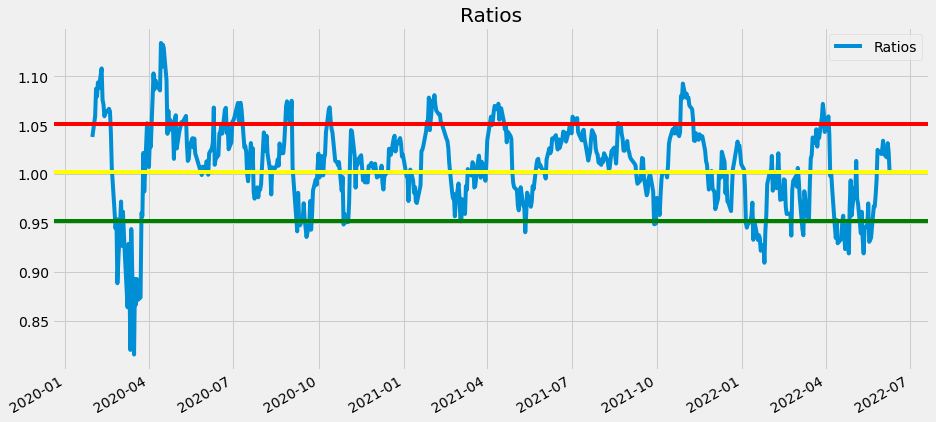

In [50]:
plt.figure(figsize=(14,7))
plt.title('Ratios')
df['Ratios'].dropna().plot(legend=True)
plt.axhline(percentile_value[0], c='green', label='5th')
plt.axhline(percentile_value[4], c='yellow', label='5th')
plt.axhline(percentile_value[7], c='red', label='5th')

In [51]:
sell = percentile_value[7]
buy = percentile_value[0]
df['Positions'] = np.where(df.Ratios > sell, -1, np.nan)
df['Positions'] = np.where(df.Ratios < buy, 1, df['Positions'])
df['Positions'] = df['Positions'].ffill()

df['Buy'] = np.where(df.Positions == 1, df['Close'], np.nan)
df['Sell'] = np.where(df.Positions == -1, df['Close'], np.nan)

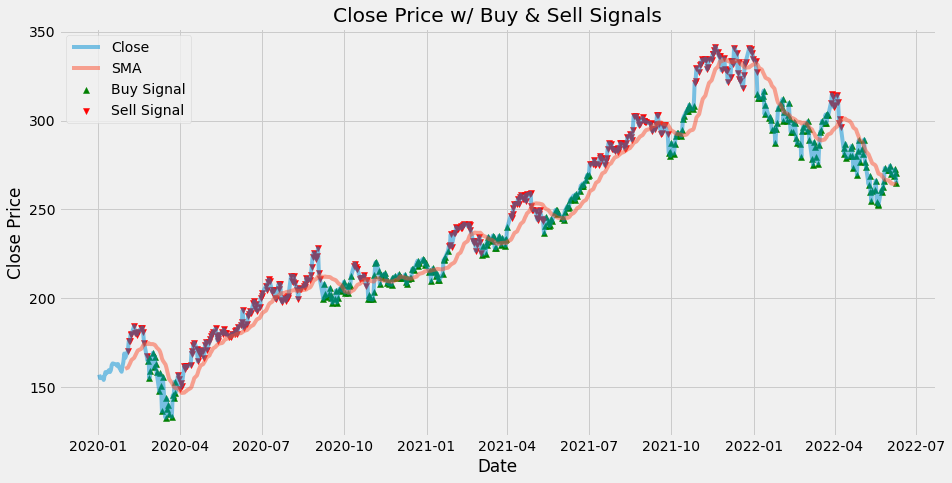

In [52]:
plt.figure(figsize=(14,7))
plt.title('Close Price w/ Buy & Sell Signals')
plt.plot(df['Close'], alpha = 0.5, label ='Close')
plt.plot(df['SMA'], alpha = 0.5, label = 'SMA')
plt.scatter(df.index, df['Buy'], color = 'green', label = 'Buy Signal', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell'], color = 'red', label = 'Sell Signal', marker = 'v', alpha = 1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [53]:
df['Strategy_Returns'] = df.Positions.shift(1)*df.Log_Returns
df['Strategy_Returns']

2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2022-06-03   -0.016747
2022-06-06   -0.004714
2022-06-07    0.013857
2022-06-08   -0.007699
2022-06-09   -0.021002
Name: Strategy_Returns, Length: 615, dtype: float64

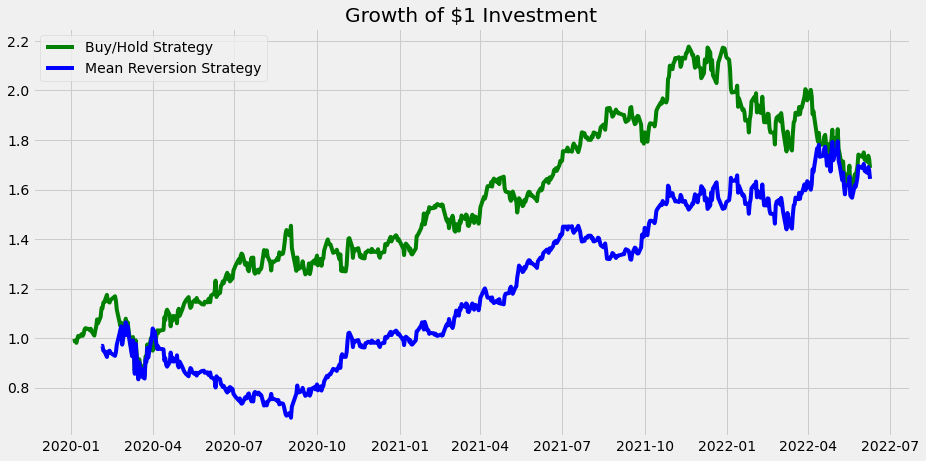

In [54]:
plt.figure(figsize=(14,7))
plt.title('Growth of $1 Investment')
plt.plot(np.exp(df['Log_Returns'].dropna()).cumprod(), c='green', label = 'Buy/Hold Strategy')
plt.plot(np.exp(df['Strategy_Returns'].dropna()).cumprod(), c='blue', label = 'Mean Reversion Strategy')
plt.legend()

In [55]:
print('Buy/Hold Strategy returns:', np.exp(df['Log_Returns'].dropna()).cumprod()[-1] - 1 )
print('Mean Reversion Strategy returns:', np.exp(df['Strategy_Returns'].dropna()).cumprod()[-1] - 1 )


Buy/Hold Strategy returns: 0.687373160976982
Mean Reversion Strategy returns: 0.6428393626271884


### Questions

1.可以当股价跌到5th 的时候买入，然后达到 75th 的时候卖出吗？ 价格的变化和 ratio 变化的 关系？
2. 